<a href="https://colab.research.google.com/github/inuneko89/DADS_6003/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.ultimatepython.co/post/python-yahoo-finance

In [4]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance


In [7]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib


--2024-02-14 09:54:43--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-14 09:54:43--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-14 09:54:43--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.s

In [8]:
!pip install TA-Lib


In [9]:
pip install scikit-learn

In [10]:
import yfinance as yf

In [11]:
tesla = yf.Ticker('AAPL')
interval = '1h'
start = '2023-1-1'
end = '2023-12-31'
df = tesla.history(interval=interval,start=start,end=end)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 09:30:00-05:00,129.770004,130.899994,125.230003,125.459999,27775505,0.0,0.0
2023-01-03 10:30:00-05:00,125.459999,125.870003,124.730003,125.345001,18104999,0.0,0.0
2023-01-03 11:30:00-05:00,125.350197,125.370003,124.349098,124.660004,11248777,0.0,0.0
2023-01-03 12:30:00-05:00,124.660004,124.940002,124.190002,124.649902,8860080,0.0,0.0
2023-01-03 13:30:00-05:00,124.669899,125.000000,124.190002,124.570000,8388062,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,191.964996,192.479996,191.725006,191.899994,4320986,0.0,0.0
2023-12-29 12:30:00-05:00,191.904999,192.229996,191.779999,191.899994,3916853,0.0,0.0
2023-12-29 13:30:00-05:00,191.904999,192.449997,191.899994,192.119995,2809737,0.0,0.0


In [12]:
import numpy as np
import pandas as pd

# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score,train_test_split

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()


In [13]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)

X = df.iloc[:,:9]

In [14]:
X

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_10,Corr
Datetime,,,,,,,,,
2023-01-03 09:30:00-05:00,129.770004,130.899994,125.230003,125.459999,27775505,0.0,0.0,NaN,NaN
2023-01-03 10:30:00-05:00,125.459999,125.870003,124.730003,125.345001,18104999,0.0,0.0,NaN,NaN
2023-01-03 11:30:00-05:00,125.350197,125.370003,124.349098,124.660004,11248777,0.0,0.0,NaN,NaN
2023-01-03 12:30:00-05:00,124.660004,124.940002,124.190002,124.649902,8860080,0.0,0.0,NaN,NaN
2023-01-03 13:30:00-05:00,124.669899,125.000000,124.190002,124.570000,8388062,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,191.964996,192.479996,191.725006,191.899994,4320986,0.0,0.0,193.479910,-0.520149
2023-12-29 12:30:00-05:00,191.904999,192.229996,191.779999,191.899994,3916853,0.0,0.0,193.245000,-0.264303
2023-12-29 13:30:00-05:00,191.904999,192.449997,191.899994,192.119995,2809737,0.0,0.0,193.051999,0.092220


In [15]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [16]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# ตรวจสอบและลบข้อมูลที่ไม่เหมาะสม
valid_indices = np.isfinite(X_train).all(axis=1) & np.isfinite(y_train)

X_train = X_train[valid_indices]
y_train = y_train[valid_indices]

# แบ่งข้อมูลเป็นชุด train และ test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# สร้างและฝึกโมเดล Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [18]:
probability = model.predict_proba(X_test)
probability

array([[0.49255741, 0.50744259],
       [0.48946656, 0.51053344],
       [0.49160672, 0.50839328],
       [0.48777226, 0.51222774],
       [0.49261264, 0.50738736],
       [0.49302413, 0.50697587],
       [0.48831189, 0.51168811],
       [0.49289313, 0.50710687],
       [0.4771129 , 0.5228871 ],
       [0.48840691, 0.51159309],
       [0.49074891, 0.50925109],
       [0.49077422, 0.50922578],
       [0.48650172, 0.51349828],
       [0.48924558, 0.51075442],
       [0.48772899, 0.51227101],
       [0.48885294, 0.51114706],
       [0.48271895, 0.51728105],
       [0.48919318, 0.51080682],
       [0.49279171, 0.50720829],
       [0.48943984, 0.51056016],
       [0.49223991, 0.50776009],
       [0.48176121, 0.51823879],
       [0.48660676, 0.51339324],
       [0.49046543, 0.50953457],
       [0.48695061, 0.51304939],
       [0.49427592, 0.50572408],
       [0.4915978 , 0.5084022 ],
       [0.49297842, 0.50702158],
       [0.48368483, 0.51631517],
       [0.48689557, 0.51310443],
       [0.

In [19]:
probability = model.predict_proba(X_test)
print(probability)

predicted = model.predict(X_test)

[[0.49255741 0.50744259]
 [0.48946656 0.51053344]
 [0.49160672 0.50839328]
 [0.48777226 0.51222774]
 [0.49261264 0.50738736]
 [0.49302413 0.50697587]
 [0.48831189 0.51168811]
 [0.49289313 0.50710687]
 [0.4771129  0.5228871 ]
 [0.48840691 0.51159309]
 [0.49074891 0.50925109]
 [0.49077422 0.50922578]
 [0.48650172 0.51349828]
 [0.48924558 0.51075442]
 [0.48772899 0.51227101]
 [0.48885294 0.51114706]
 [0.48271895 0.51728105]
 [0.48919318 0.51080682]
 [0.49279171 0.50720829]
 [0.48943984 0.51056016]
 [0.49223991 0.50776009]
 [0.48176121 0.51823879]
 [0.48660676 0.51339324]
 [0.49046543 0.50953457]
 [0.48695061 0.51304939]
 [0.49427592 0.50572408]
 [0.4915978  0.5084022 ]
 [0.49297842 0.50702158]
 [0.48368483 0.51631517]
 [0.48689557 0.51310443]
 [0.49161421 0.50838579]
 [0.48522951 0.51477049]
 [0.49241566 0.50758434]
 [0.48975284 0.51024716]
 [0.4892757  0.5107243 ]
 [0.49170461 0.50829539]
 [0.48262319 0.51737681]
 [0.49001503 0.50998497]
 [0.4746761  0.5253239 ]
 [0.49261369 0.50738631]


In [20]:
print(metrics.confusion_matrix(y_test, predicted))

[[  0 168]
 [  0 193]]


In [21]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       168
           1       0.53      1.00      0.70       193

    accuracy                           0.53       361
   macro avg       0.27      0.50      0.35       361
weighted avg       0.29      0.53      0.37       361



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
print(model.score(X_test,y_test))
0.528

0.5346260387811634


0.528

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# สร้าง SimpleImputer
imputer = SimpleImputer(strategy='mean')

# แทนที่ค่าที่หายไปใน X ด้วยค่าเฉลี่ยของแต่ละคอลัมน์
X_imputed = imputer.fit_transform(X)

# ใช้ cross-validation เพื่อประเมินโมเดล
cross_val = cross_val_score(LogisticRegression(), X_imputed, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())


[0.52571429 0.52571429 0.52873563 0.52873563 0.52873563 0.52873563
 0.52873563 0.52873563 0.52873563 0.52873563]
0.5281313628899836


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


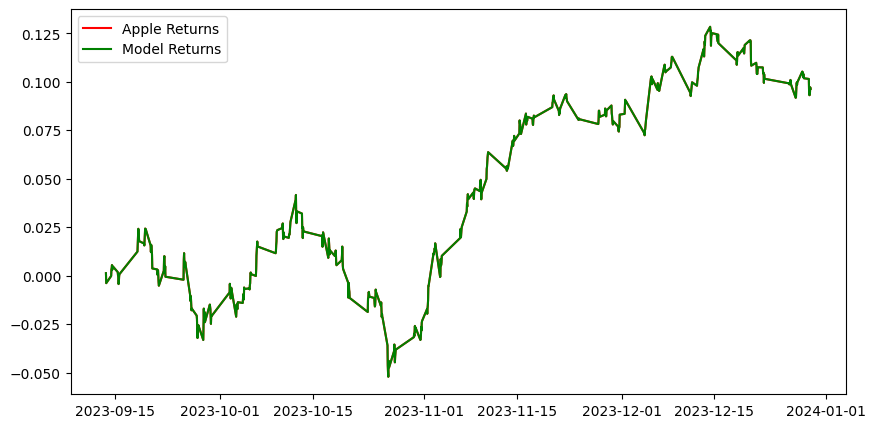

In [24]:
from sklearn.impute import SimpleImputer

# สร้าง SimpleImputer
imputer = SimpleImputer(strategy='mean')

# แทนที่ค่าที่หายไปใน X ด้วยค่าเฉลี่ยของแต่ละคอลัมน์
X_imputed = imputer.fit_transform(X)

# ทำนายสัญญาณด้วยโมเดล Logistic Regression
predicted_signal = model.predict(X_imputed)

# เพิ่มคอลัมน์ Predicted_Signal ใน DataFrame
df['Predicted_Signal'] = predicted_signal

# คำนวณผลตอบแทนของ Nifty
df['Nifty_returns'] = np.log(df['Close'] / df['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(df[split:]['Nifty_returns'])

# คำนวณผลตอบแทนของกลยุทธ์
df['Strategy_returns'] = df['Nifty_returns'] * df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Strategy_returns'])

# พล็อตกราฟ
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Apple Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Model Returns')
plt.legend()
plt.show()


In [ ]:
 from sklearn.metrics import mean_squared_error

# ทำนายสัญญาณในชุดข้อมูลทดสอบ
predicted_signals_test = model.predict(X_test)

# คำนวณ MSE
mse = mean_squared_error(y_test, predicted_signals_test)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.75
